# DAML4 notes
## Week 7 - Support Vector Machines 
<hr style="border:2px solid black"> </hr>
Consider performing binary classification with a linear model. We want to find a model that is able to separate points from different classes in our training data.

That is, we are given $\{\mathbf{x}^{(n)}, y^{(n)}\}_{n=0}^{N-1}$ where $\mathbf{x}\in \mathbb{R}^{D}$ and $y\in \{-1,1\}$ and we want a model $f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b$ such that points from the two classes are separated by the hyperplane $f(\mathbf{x})=0$. However, what we actually care about is how well this model will generalise to unseen test data.

Given linearly separable data, we motivated maximising the margin (the distance between the hyperplane $f(\mathbf{x})=0$ and the nearest points from each class) as a way of producing a linear model that could generalise. This can be achieved by solving the optimisation problem

$$\underset{\mathbf{w}}{\textrm{minimise }}{\lVert\mathbf{w}\lVert}^2 \ \text{subject to} \ y^{(n)}(\mathbf{w}^\top \mathbf{x}^{(n)}+ b) \geq 1 \ \forall n$$

which gives us a hard-margin SVM. However, it is not possible to solve this problem for data that isn't linearly seperable. Moreover, we saw that it was reasonable to allow for a few misclassifications to get a larger margin than we would otherwise. We could instead produce a *soft-margin SVM* by finding the parameters of a linear model that minimise 

$$L_{SVM}= \frac{1}{2}\lVert \mathbf{w}\lVert^2 +C\sum_n  \max\Bigl(0, 1-y^{(n)} f(\mathbf{x}^{(n)})\Bigl)$$

$C$ is a hyperparameter that tells us how much we care about misclassifications versus margin size. As $C$ tends to infinity, we get the hard margin solution.

## Hard margin SVM

Let's first generate some synthetic training data that is linearly separable.

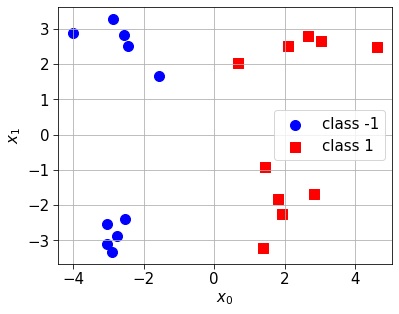

In [1]:
# Grouping cell imports here for tidiness
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification

# This makes matplotlib output nice figures without much tweaking
plt.rcParams.update(
    {
        "lines.markersize": 10,  # Big points
        "font.size": 15,  # Larger font
        "xtick.major.size": 5.0,  # Bigger xticks
        "ytick.major.size": 5.0,  # Bigger yticks
    }
)

# Generate some separable data. The class labels will be 0 and 1 by default
# We don't actually have to change 0 to -1. Sklearn will do everything for us
# We are free to call the class -1 or 0 in the legend regardless.
X, y = make_classification(
    n_samples=20, n_features=2, random_state=0, n_redundant=0, class_sep=2.5
)

# Let's plot our data
colours = ["b", "r"]
fig, ax = plt.subplots(figsize=[6, 6])
ax.set_aspect("equal", "box")
ax.scatter(X[y == 0, 0], X[y == 0, 1], color=colours[0])
ax.scatter(X[y == 1, 0], X[y == 1, 1], color=colours[1], marker="s")
ax.grid()
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
plt.legend(["class -1", "class 1"])

Now let's use the [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) (linear support vector classification) class from sklearn. The "linear" here is referring to the linear kernel (i.e. we are not transforming our data points). When we call its `.fit` method it learns a soft-margin SVM by default but we can produce a hard margin SVM by setting the $C$ hyperparameter to infinity.

We will train this model on the data, and then plot its decision boundary.

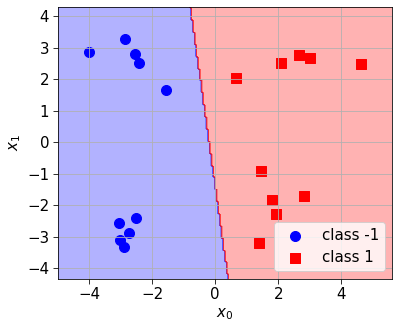

In [2]:
# Import linear SVM class and decision boundary code
from sklearn.svm import LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay


# Create model with C as infinity
model = LinearSVC(C=np.inf)

# Fit to training data. This does all the training under the hood.
model.fit(X, y)

# Reproduce plot
colours = ["b", "r"]
fig, ax = plt.subplots(figsize=[6, 6])
ax.set_aspect("equal", "box")
ax.scatter(X[y == 0, 0], X[y == 0, 1], color=colours[0])
ax.scatter(X[y == 1, 0], X[y == 1, 1], color=colours[1], marker="s")
ax.grid()
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
plt.legend(["class -1", "class 1"])

# Plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
    alpha=0.3,
    grid_resolution=200,
    cmap=ListedColormap(colours),
    ax=ax,
)

The decision boundary does look equidistant to the nearest points from both class. Recall that such points are called support vectors, which we denote as $\mathbf{x}_-$ and $\mathbf{x}_+$ for classes $-1$ and $1$ respectively. When there are no margin violations, these points satisfy $\mathbf{w}^\top \mathbf{x}_+ + b=1$ and $\mathbf{w}^\top \mathbf{x}_- + b=-1$. You will confirm this in the lab.

## Soft-margin SVM

Here, we will generate some synthetic data that isn't linearly seperable and compare two SVMs for a low and high value of $C$.

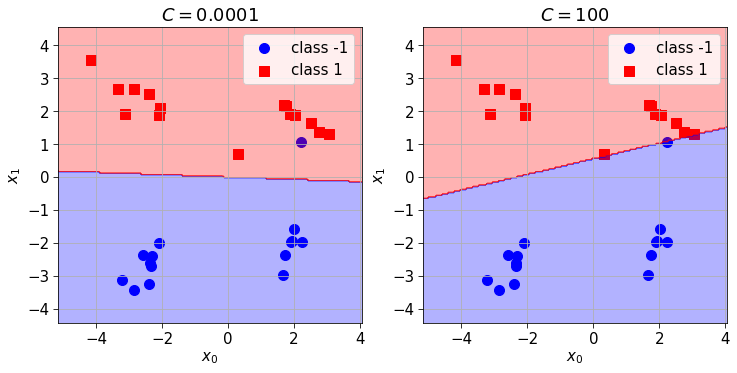

In [3]:
# Make non-seperable data
X, y = make_classification(
    n_samples=30, n_features=2, random_state=0, n_redundant=0, class_sep=2
)

# We are going to produce a subplot for two different values of C
C_values = [0.0001, 100]

fig, ax = plt.subplots(1, 2, figsize=[12, 6])

for i, c in enumerate(C_values):

    # Create model with corresponding
    model = LinearSVC(C=c, max_iter=10000)

    # Fit to training data
    model.fit(X, y)

    # Plot points
    colours = ["b", "r"]
    ax[i].set_aspect("equal", "box")
    ax[i].scatter(X[y == 0, 0], X[y == 0, 1], color=colours[0])
    ax[i].scatter(X[y == 1, 0], X[y == 1, 1], color=colours[1], marker="s")
    ax[i].grid()
    ax[i].set_xlabel("$x_0$")
    ax[i].set_ylabel("$x_1$")
    ax[i].legend(["class -1", "class 1"])
    ax[i].set_title(f"$C={c}$")

    # Plot decision boundary
    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        response_method="predict",
        alpha=0.3,
        grid_resolution=200,
        cmap=ListedColormap(colours),
        ax=ax[i],
    )

The classifier on the left has a larger margin, at the expense of a misclassification because the penalty for misclassifications is small. For the classifier on the right, the penalty is large and it hasn't made any misclassifications, but has a tiny margin.

## Kernel SVM

For linear classification thus far we have been considering models where we do not transform our data i.e. $f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b$. This is largely because it made sense pedagogically. As we saw in regression, our linear model can be written more generally as

$$f(\mathbf{x}) = \mathbf{w}^\top \phi(\mathbf{x}) + b$$

where $\phi$ maps $\mathbf{x}$ to a feature vector $\phi({\mathbf{x}})\in\mathbb{R}^{Z}$ and we have learnable weights $\mathbf{w}\in \mathbb{R}^{Z}$ and a bias. If we use an appropriate $\phi$ (usually one that maps to a high dimension) then we can transform our data so that it is linearly seperable in feature space.

In the lecture, we saw that we could write our model in an alternate *dual* form, where the output is a weighted dot product between the input point and every point in the training data:

$$f(\mathbf{x}) = \sum_n \alpha_n y^{(n)}\phi(\mathbf{x}^{(n)})^\top  \phi(\mathbf{x})+ b.$$

We could then learn an SVM by finding the $\alpha_0,\dots,\alpha_{N-1}$ values that minimise a big horrible expression that I won't rewrite here.

We also saw that we could use the *kernel trick* because in both the dual form above, and in the big horrible objective, $\phi$ only appeared in dot products e.g. $\phi(\mathbf{x}^{(j)})^\top \phi(\mathbf{x}^{(k)})$.

This means that if we know the kernel for $\phi$: $k(\mathbf{x}^{(j)},\mathbf{x}^{(k)})=\phi(\mathbf{x}^{(j)})^\top \phi(\mathbf{x}^{(k)})$ then we are able to do all our feature mapping **implicitly** without having to compute the features. This kernel formulation isn't unique to SVMs, but they often appear together because in SVMs most of the learnable $\alpha_0,\dots,\alpha_{N-1}$ are zero. They are only non-zero for the support vectors, so you only need to store these as opposed to a whole training set.

In sklearn we can implement kernel SVMs using the [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn-svm-svc) class. Let's take the dataset above and look at an SVM with an RBF kernel with a high misclassification penalty.

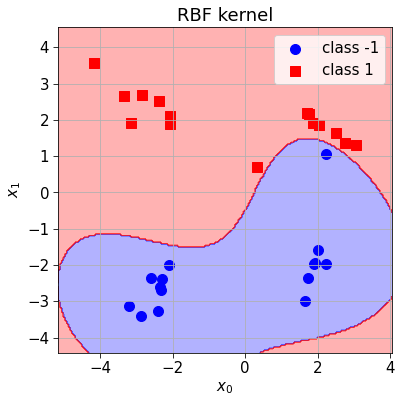

In [4]:
# Import SVC class
from sklearn.svm import SVC

fig, ax = plt.subplots(figsize=[6, 6])

# Create model with corresponding
model = SVC(kernel="rbf", C=100)

# Fit to training data
model.fit(X, y)

# Plot points
colours = ["b", "r"]
ax.set_aspect("equal", "box")
ax.scatter(X[y == 0, 0], X[y == 0, 1], color=colours[0])
ax.scatter(X[y == 1, 0], X[y == 1, 1], color=colours[1], marker="s")
ax.grid()
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
ax.legend(["class -1", "class 1"])
ax.set_title(f"RBF kernel")

# Plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
    alpha=0.3,
    grid_resolution=200,
    cmap=ListedColormap(colours),
    ax=ax,
)

<hr style="border:2px solid black"> </hr>

#### Written by Elliot J. Crowley and &copy; The University of Edinburgh 2022-23